# Testing some part of my code that may not work properly. 

## Collision with walls :

Only issue : hard to test.

What I will do : I will try to make my new code while focusing on this part of making my code testable.

For now, I will try directly by modifying the code and visualizing it with *matplotlib*. The issue is that if I go with another code then I have to modify it because I want something easily testable. 

Was really a pain, but it seems to work fine.

In [20]:
from main import square, DSMC, get_options, Particule, MyVector

from pprint import pprint
import matplotlib.pyplot as plt

In [21]:
# Tube
system_cfg_path = 'cfg_files/test_collision_algo/square.cfg'
simulation_cfg_path = 'cfg_files/tubes_testing/simulation_steady.cfg'
processing_simulation_path = 'cfg_files/tubes_testing/processing_1_steady.cfg'

options = {
    'system' : system_cfg_path,
    'simulation' : simulation_cfg_path,
    'processing' : processing_simulation_path
}

In [22]:
options = get_options(options)

In [23]:
pprint(options)

{'processing': {'args_density': [250, 15, 20],
                'compute_collisions': True,
                'compute_density': True,
                'compute_hist_distribution_evolution': False,
                'compute_number_of_particles': True,
                'compute_spatial_distribution': False,
                'compute_system_evolution': False,
                'compute_temperature': False,
                'files_to_merge': ['1', '2'],
                'frames_to_compute': ['last'],
                'id_test': '1',
                'merge_csv': False,
                'path': PosixPath('/home/paul/Documents/projects/neutralisation-faisceau-ions-negatifs-propulsion-satellite/results/tube_1_steady'),
                'period': 50,
                'save': True,
                'saving_offset': 0},
 'simulation': {'dt': 0.01,
                'number_of_steps': 20000,
                'scheme': 'euler_explicit',
                'seed': 1111},
 'system': {'drifts': [1.0],
            'flux_in

In [24]:
system = square(options['system'])

In [25]:
def f(Y, t, m, q):
    vx = Y[3]
    vy = Y[4]
    vz = Y[5]

    ax = 0
    ay = 0
    az = 0
    return np.array([vx, vy, vz, ax, ay, az])
        
system.init_dsmc(mean_speed=200,
                     integration_scheme='euler_explicit', f=f, f_args=[])

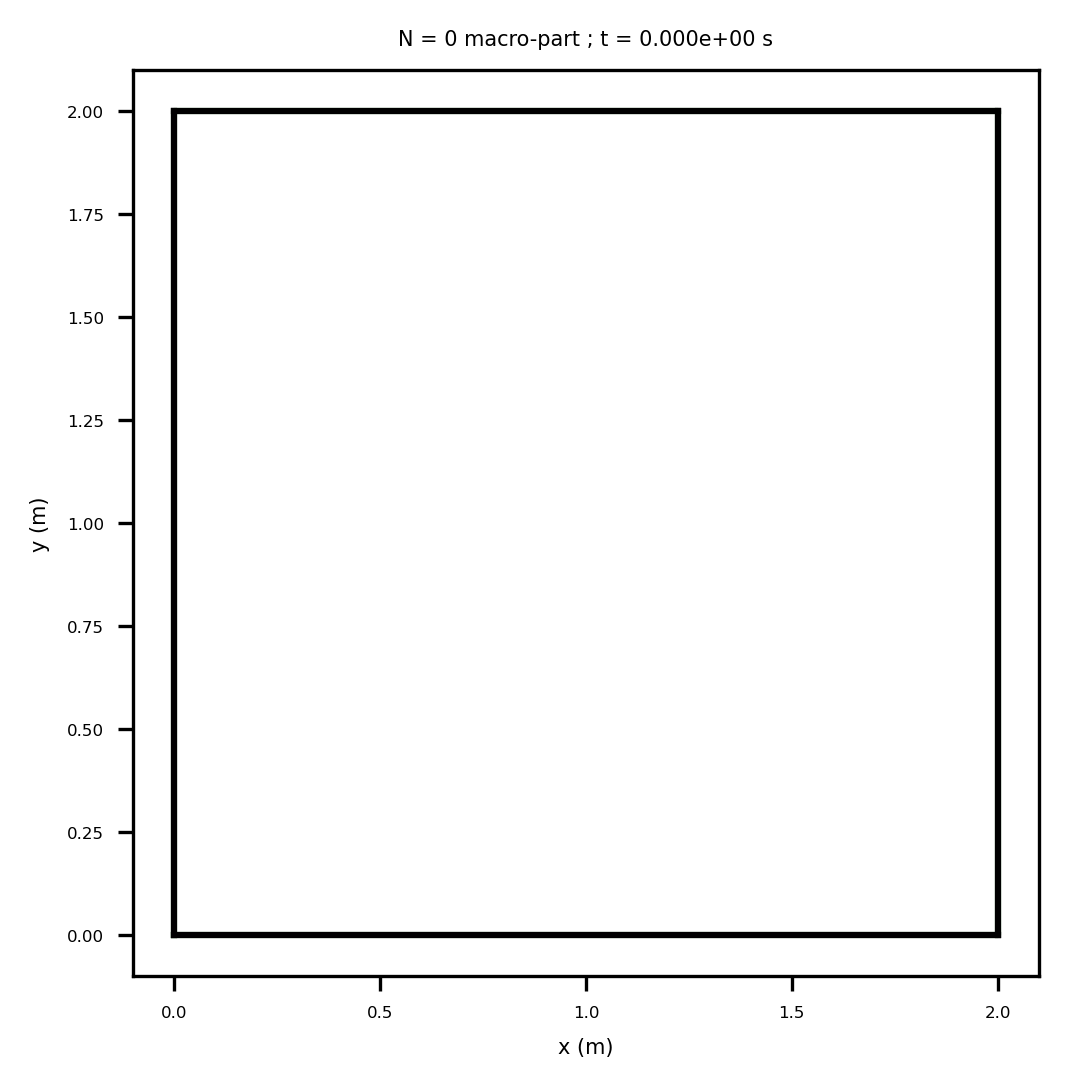

In [26]:
system.plot()

In [27]:
DSMC = system.dsmc

In [28]:
part=Particule(pos = MyVector(3,1,0), speed = MyVector(1,0,0))

In [29]:
DSMC._collision_with_wall(part)

True

In [30]:
part.to_string()

'None:I particule of charge 0 C and mass 2.35800283e-25 kg in position (0.99462,1.0) m with speed (-1.0,0.0) m/s'

In [73]:
def plot_system(ax, segments):
    for segment in segments :
        x1, y1, x2, y2 = segment
        plt.plot([x1, x2], [y1, y2], color = 'k')
        
def plot_part(ax, p1, p2, v1, v2, r):
    plt.plot([p1.x, p2.x], [p1.y, p2.y], '--', color = 'b')
    c1 = plt.Circle((p1.x, p1.y), r)
    c2 = plt.Circle((p2.x, p2.y), r)
    ax.add_artist(c1)
    ax.add_artist(c2)
    plt.arrow(x = p1.x, y = p1.y, dx = v1.x*0.5, dy = v1.y*0.5, color = 'g', width = 0.01)
    plt.arrow(x = p2.x, y = p2.y, dx = v2.x*0.5, dy = v2.y*0.5, color = 'r', width = 0.01)

def make_test(dsmc, pos, speed, radius):
    part=Particule(pos = pos, speed = speed, radius = radius)
    dsmc._collision_with_wall(part)
    
    new_pos, new_speed = part.get_pos(),part.get_speed()
    
    fig, ax = plt.subplots(figsize = (8,8), clear=True)
    plot_part(ax, pos, new_pos, speed, new_speed, radius)
    plot_system(ax, dsmc.walls)
    plt.axis('equal')
    plt.show()
    

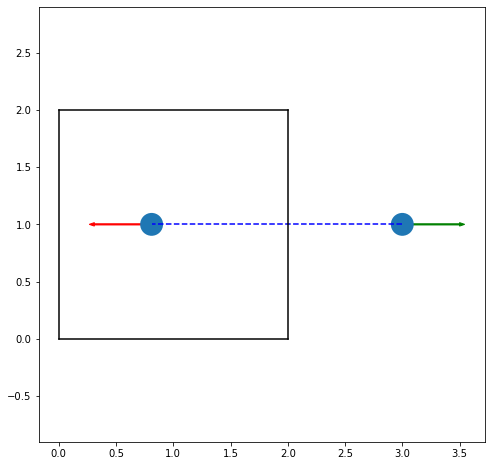

In [74]:
make_test(DSMC, MyVector(3,1,0), MyVector(1,0,0), radius = 0.1)

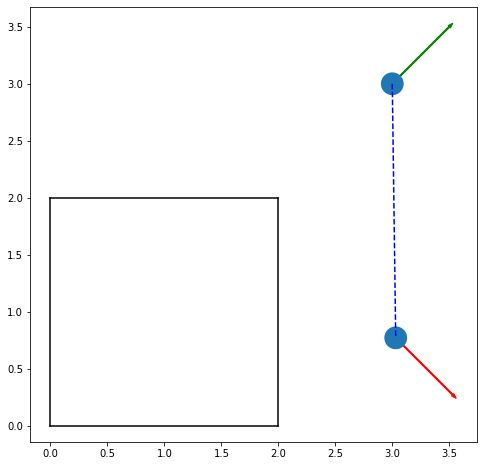

In [75]:
make_test(DSMC, MyVector(3,3,0), MyVector(1,1,0), radius = 0.1)

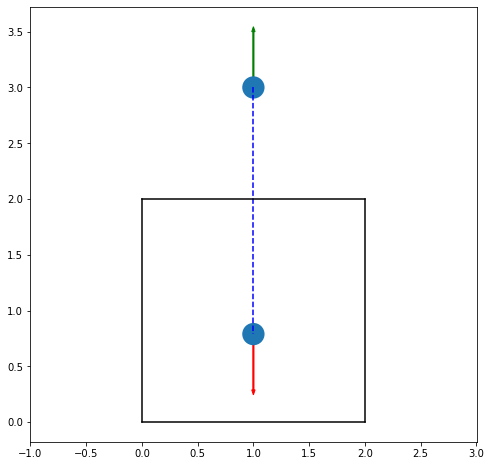

In [76]:
make_test(DSMC, MyVector(1,3,0), MyVector(0,1,0), radius = 0.1)

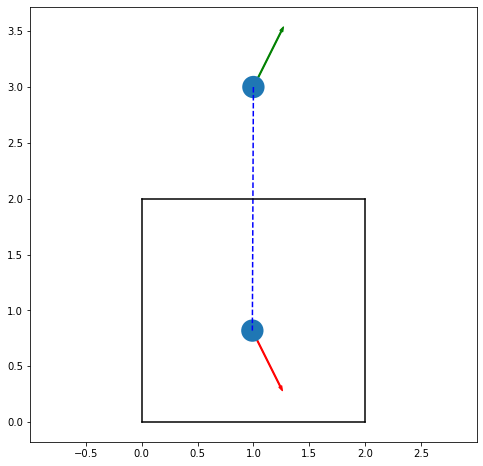

In [77]:
make_test(DSMC, MyVector(1,3,0), MyVector(0.5,1,0), radius = 0.1)

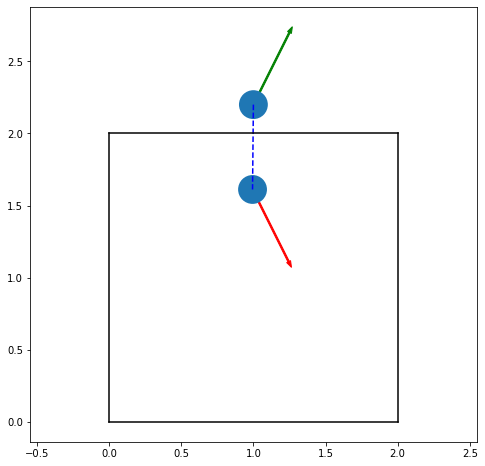

In [78]:
make_test(DSMC, MyVector(1,2.2,0), MyVector(0.5,1,0), radius = 0.1)

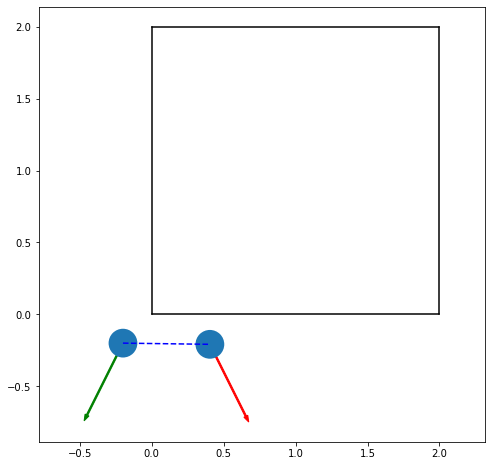

In [82]:
make_test(DSMC, MyVector(-0.2,-0.2,0), MyVector(-0.5,-1,0), radius = 0.1)